<a href="https://colab.research.google.com/github/Abhinavpanjiyar1/100-days-python-projects/blob/main/pytorch_workflow.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# PYTORCH WORKFLOW

In [1]:
import torch
from torch import nn
import matplotlib.pyplot as plt

In [2]:
# Linear regression

weight = 0.7
bias = 0.3
start = 0
end= 1
step = 0.02
X = torch.arange(start,end,step).unsqueeze(dim=1)
y= weight * X + bias

X[:10], y[:10]


(tensor([[0.0000],
         [0.0200],
         [0.0400],
         [0.0600],
         [0.0800],
         [0.1000],
         [0.1200],
         [0.1400],
         [0.1600],
         [0.1800]]),
 tensor([[0.3000],
         [0.3140],
         [0.3280],
         [0.3420],
         [0.3560],
         [0.3700],
         [0.3840],
         [0.3980],
         [0.4120],
         [0.4260]]))

In [3]:
len(X), len(y)

(50, 50)

# SPLITTING DATA INTO TRAIN AND TEST SETS

In [4]:
train_split = int(0.8 * len(X))
X_train, y_train = X[:train_split], y[:train_split]
X_test, y_test = X[train_split:], y[train_split:]

len(X_train), len(y_train), len(X_test), len(y_test)


(40, 40, 10, 10)

In [5]:
X_train, y_train

(tensor([[0.0000],
         [0.0200],
         [0.0400],
         [0.0600],
         [0.0800],
         [0.1000],
         [0.1200],
         [0.1400],
         [0.1600],
         [0.1800],
         [0.2000],
         [0.2200],
         [0.2400],
         [0.2600],
         [0.2800],
         [0.3000],
         [0.3200],
         [0.3400],
         [0.3600],
         [0.3800],
         [0.4000],
         [0.4200],
         [0.4400],
         [0.4600],
         [0.4800],
         [0.5000],
         [0.5200],
         [0.5400],
         [0.5600],
         [0.5800],
         [0.6000],
         [0.6200],
         [0.6400],
         [0.6600],
         [0.6800],
         [0.7000],
         [0.7200],
         [0.7400],
         [0.7600],
         [0.7800]]),
 tensor([[0.3000],
         [0.3140],
         [0.3280],
         [0.3420],
         [0.3560],
         [0.3700],
         [0.3840],
         [0.3980],
         [0.4120],
         [0.4260],
         [0.4400],
         [0.4540],
         [

In [43]:
def plot_predictions (train_data = X_train,
                      train_labels= y_train,
                      test_data=X_test,
                      test_labels=y_test,
                      predictions= None):
  """
  Plot training data, test data and compare predictions.
  """
  plt.figure(figsize=(10,4))

  #plot training data in green
  plt.scatter(train_data, train_labels, c="g", s=5, label= "Training data")

  #plot test data in red
  plt.scatter(test_data, test_labels, c="r", s=5, label ="Test data")

  if predictions is not None:
    plt.scatter(test_data, predictions, c="purple", s=5, label= "Predictions" )

    #show the legend

    plt.legend(prop = {"size":18});


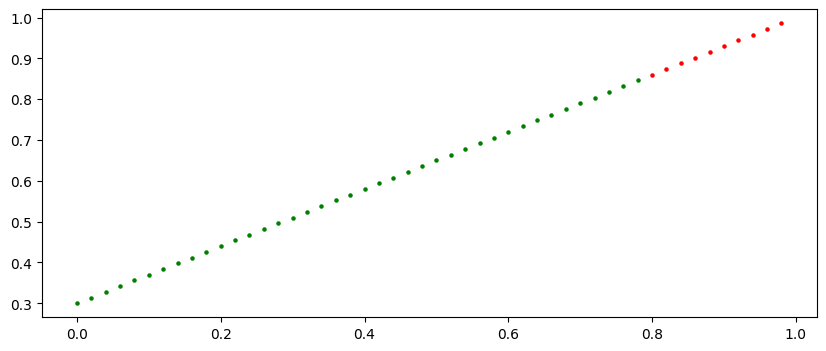

In [7]:
plot_predictions();


In [8]:
# building 1st pytorch model

# creating linear regression model class
from torch import nn
class LinearRegressionModel(nn.Module):
  def __init__(self):
    super().__init__()
    self.Weights =  nn.Parameter(torch.randn(1,  # Specify the shape of the tensor
                                            dtype=torch.float,
                                            requires_grad=True))
    self.bias = nn.Parameter(torch.randn(1,  # Specify the shape of the tensor
                                         dtype=torch.float,
                                         requires_grad=True))

  def forward(self, x:torch.Tensor) -> torch.tensor:
      return self.Weights * x + self.bias # Make sure Weights is capitalized here to match __init__









In [9]:
torch.manual_seed(50)

model_0 = LinearRegressionModel()
list(model_0.parameters())


[Parameter containing:
 tensor([0.4625], requires_grad=True),
 Parameter containing:
 tensor([-0.1692], requires_grad=True)]

In [10]:
model_0.state_dict()

OrderedDict([('Weights', tensor([0.4625])), ('bias', tensor([-0.1692]))])

In [11]:
# make prediction with model

with torch.inference_mode():
  y_preds = model_0(X_test)

y_preds

tensor([[0.2008],
        [0.2100],
        [0.2193],
        [0.2285],
        [0.2378],
        [0.2470],
        [0.2563],
        [0.2655],
        [0.2748],
        [0.2840]])

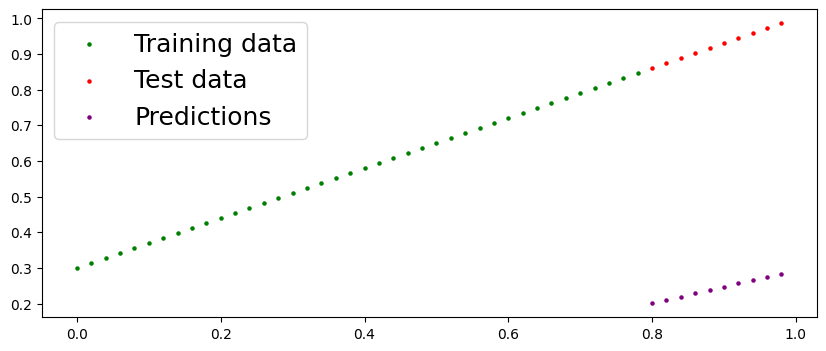

In [12]:
plot_predictions(predictions = y_preds)

In [13]:
# setup a loss function

loss_fn = nn.L1Loss()


# setup a optimizer
optimizer = torch.optim.SGD(params= model_0.parameters(),lr = 0.1) # lr= learning rate

In [14]:
torch.manual_seed(40)
# Building a training loop in parameter and testing loop
# training
epochs =100

epoch_count= []
loss_values= []
test_loss_values= []


for epoch in range( epochs ):

  model_0.train()

  y_pred = model_0(X_train)
  loss = loss_fn(y_pred, y_train)
  print(f"LOSS: {loss}")
  optimizer.zero_grad()
  loss.backward()
  optimizer.step()

# testing
  model_0.eval()
  with torch.inference_mode():
    test_pred = model_0(X_test)
    test_loss = loss_fn(test_pred, y_test)
  if epoch % 10 == 0:
    epoch_count.append(epoch)
    loss_values.append(loss)
    test_loss_values.append(test_loss)
    print(f"EPOCH: {epoch} | Loss: {loss} | Test loss: {test_loss}")
    print(model_0.state_dict())



LOSS: 0.561846137046814
EPOCH: 0 | Loss: 0.561846137046814 | Test loss: 0.5458905100822449
OrderedDict([('Weights', tensor([0.5015])), ('bias', tensor([-0.0692]))])
LOSS: 0.4466361403465271
LOSS: 0.331426203250885
LOSS: 0.21621616184711456
LOSS: 0.1010061725974083
LOSS: 0.014432480558753014
LOSS: 0.08156018704175949
LOSS: 0.03364982455968857
LOSS: 0.0815601721405983
LOSS: 0.03364982455968857
LOSS: 0.0815601721405983
EPOCH: 10 | Loss: 0.0815601721405983 | Test loss: 0.018095379695296288
OrderedDict([('Weights', tensor([0.6689])), ('bias', tensor([0.3458]))])
LOSS: 0.03364982455968857
LOSS: 0.0815601721405983
LOSS: 0.03364982455968857
LOSS: 0.0815601721405983
LOSS: 0.03364982455968857
LOSS: 0.0815601721405983
LOSS: 0.03364982455968857
LOSS: 0.0815601721405983
LOSS: 0.03364982455968857
LOSS: 0.0815601721405983
EPOCH: 20 | Loss: 0.0815601721405983 | Test loss: 0.018095379695296288
OrderedDict([('Weights', tensor([0.6689])), ('bias', tensor([0.3458]))])
LOSS: 0.03364982455968857
LOSS: 0.081

In [15]:
import numpy as np
np.array(torch.tensor(loss_values).numpy()), test_loss_values


(array([0.56184614, 0.08156017, 0.08156017, 0.08156017, 0.08156017,
        0.08156017, 0.08156017, 0.08156017, 0.08156017, 0.08156017],
       dtype=float32),
 [tensor(0.5459),
  tensor(0.0181),
  tensor(0.0181),
  tensor(0.0181),
  tensor(0.0181),
  tensor(0.0181),
  tensor(0.0181),
  tensor(0.0181),
  tensor(0.0181),
  tensor(0.0181)])

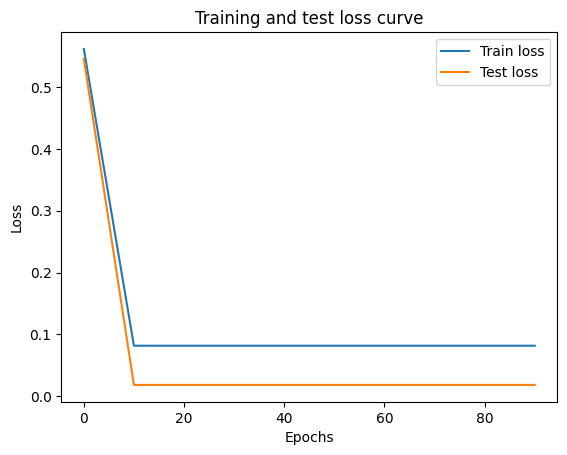

In [16]:
# plot the loss curve

plt.plot(epoch_count, np.array(torch.tensor(loss_values).numpy()), label = "Train loss")
plt.plot(epoch_count, test_loss_values, label = "Test loss")
plt.title("Training and test loss curve")
plt.ylabel("Loss")
plt.xlabel("Epochs")
plt.legend();


In [17]:
with torch.inference_mode():
  y_preda_new = model_0(X_test)

In [18]:
model_0.state_dict()

OrderedDict([('Weights', tensor([0.6299])), ('bias', tensor([0.2458]))])

In [19]:
weight, bias

(0.7, 0.3)

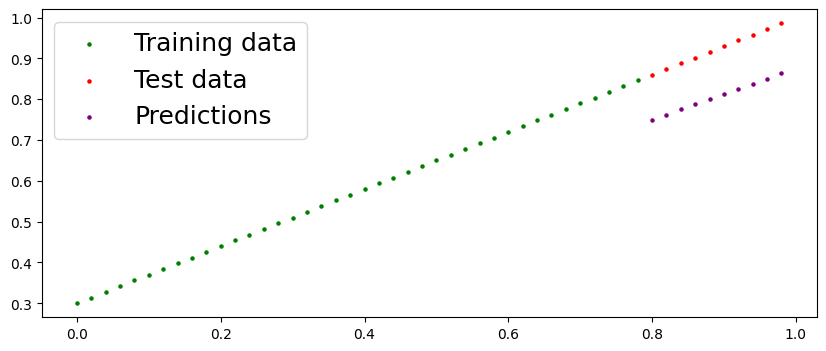

In [20]:
plot_predictions (predictions = y_preda_new)

# SAVING A MODEL IN PYTORCH


In [22]:
# saving a pytorch model

from pathlib import Path

#create model directory

MODEL_PATH = Path("models")
MODEL_PATH.mkdir(parents = True, exist_ok = True)

#Create model save path

MODEL_NAME = "01_pytorch_workflow_model_0.pth"
MODEL_SAVE_PATH = MODEL_PATH / MODEL_NAME

# save the model state dict

print(f"Saving model to : {MODEL_SAVE_PATH}")
torch.save(obj = model_0.state_dict(), f=MODEL_SAVE_PATH)


Saving model to : models/01_pytorch_workflow_model_0.pth


In [24]:
!ls -1 models

01_pytorch_workflow_model_0.pth


# LOADING A PYTORCH MODEL

In [25]:
model_0.state_dict()

OrderedDict([('Weights', tensor([0.6299])), ('bias', tensor([0.2458]))])

In [29]:
loaded_model_0 = LinearRegressionModel()

loaded_model_0.load_state_dict(torch.load(f= MODEL_SAVE_PATH))

<All keys matched successfully>

In [30]:
loaded_model_0.state_dict()

OrderedDict([('Weights', tensor([0.6299])), ('bias', tensor([0.2458]))])

In [31]:
model_0.eval()
with torch.inference_mode():
  loaded_model_preds = loaded_model_0(X_test)

loaded_model_preds

tensor([[0.7497],
        [0.7623],
        [0.7749],
        [0.7875],
        [0.8001],
        [0.8127],
        [0.8253],
        [0.8379],
        [0.8505],
        [0.8631]])

In [32]:
y_preds == loaded_model_preds

tensor([[True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True]])

In [33]:
# make some model preds

model_0.eval()
with torch.inference_mode():
  y_preds = model_0(X_test)

y_preds


tensor([[0.7497],
        [0.7623],
        [0.7749],
        [0.7875],
        [0.8001],
        [0.8127],
        [0.8253],
        [0.8379],
        [0.8505],
        [0.8631]])

In [34]:
y_preds == loaded_model_preds

tensor([[True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True]])

# putting it all together

In [39]:
import torch
from torch import nn
import matplotlib.pyplot as plt
torch.__version__

'2.3.1+cu121'

In [40]:
# setup device agnostic mode

device = "cuda" if torch.cuda.is_available() else "cpu"
print(f"using device: {device}")

using device: cpu


#DATA


In [41]:
weight = 0.7
bias = 0.3

start = 0
end = 1
step = 0.02

X = torch.arange(start,end,step).unsqueeze(dim = 1)
y = weight * X + bias
X[:10], y[:10]

(tensor([[0.0000],
         [0.0200],
         [0.0400],
         [0.0600],
         [0.0800],
         [0.1000],
         [0.1200],
         [0.1400],
         [0.1600],
         [0.1800]]),
 tensor([[0.3000],
         [0.3140],
         [0.3280],
         [0.3420],
         [0.3560],
         [0.3700],
         [0.3840],
         [0.3980],
         [0.4120],
         [0.4260]]))

In [42]:
# split the data

train_split = int(0.8 * len(X))
X_train, y_train = X[:train_split], y[:train_split]
X_test, y_test = X[train_split:], y[train_split:]
len(X_train), len(y_train), len(X_test), len(y_test)

(40, 40, 10, 10)

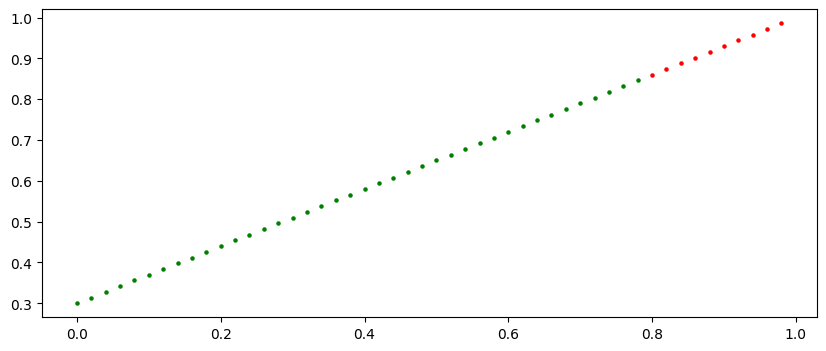

In [44]:
#plot the data
plot_predictions(X_train,y_train, X_test, y_test)

# Building a pytorch linear model